__Data Preprocessing and Sourcing__

In [3]:
#importing libraries required for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing the data 
df_data = pd.read_csv('train.csv')

In [5]:
#displaying data
df_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#shape of dataframe
df_data.shape

(1460, 81)

In [7]:
#describing dataframe
df_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
#changing default display options
pd.options.display.max_colwidth = 255
pd.options.display.max_rows=225

In [9]:
#checking null
df_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
#columns in dataframe
df_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
#count of dataframe
df_data.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
BsmtCond         1423
BsmtExposure     1422
BsmtFinType1     1423
BsmtFinSF1       1460
BsmtFinType2     1422
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1459
1stFlrSF         1460
2ndFlrSF         1460
LowQualFin

__Note  :__  There are 1460 rows and 81 columns in dataframe


In [12]:
#dropping duplicate values in dataset
df_data = df_data.drop_duplicates()
print(f'\nShape of the dataframe:\n{df_data.shape}')
df_data.head()


Shape of the dataframe:
(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
#removing unwanted columns
df_data.drop(['Id'], axis=1, inplace=True)

In [14]:
#removing columns where values are same
unique_data = df_data.apply(lambda x:x.nunique())
df = df_data.drop(unique_data[unique_data < 2].index, axis = 1)

In [15]:
#checking for percentage of missing values per column
print(df_data.shape)
print(((df_data.isnull().sum()/df_data.shape[0])*100).round(2))

(1460, 80)
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00


In [16]:
#dropping Columns having more missing values
df_data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage'], axis=1, inplace=True)
print(((df_data.isnull().sum()/df_data.shape[0])*100).round(2))

MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBa

In [17]:
#dropping rows for the NaN values 
df_data.dropna(axis='rows', inplace=True)
#checking for percentage of missing values per column
print(df_data.shape)
print(((df_data.isnull().sum()/df_data.shape[0])*100).round(2))

(1338, 74)
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
Ha

In [18]:
#creating derived features
#converting dates (YearBuilt, YearRemodAdd, GarageYrBlt) to days (NewYearBuilt, NewYearRemodAdd, NewGarageYrBlt) from today
df_data['NewYearBuilt'] = pd.datetime.now().year - df_data['YearBuilt']
df_data['NewYearRemodAdd'] = pd.datetime.now().year - df_data['YearRemodAdd']
df_data['NewGarageYrBlt'] = pd.datetime.now().year - df_data['GarageYrBlt']

In [19]:
#separate numerical and categorical fields for analysis

#final column:
out_col = 'SalePrice'

#numeric columns: 
num_col = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
           'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'NewYearBuilt', 'NewYearRemodAdd',
           'NewGarageYrBlt']
print(len(num_col))

#categorical columns: 
category_col = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
           'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
           'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
           'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 
           'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
print(len(category_col))

#list distinct values in categorical columns
for col in category_col:
    print(col,' : ',df_data[col].unique())

30
43
MSSubClass  :  [ 60  20  70  50 190  45 120  30  85  90  80 160  75 180  40]
MSZoning  :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street  :  ['Pave' 'Grvl']
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  :  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities  :  ['AllPub' 'NoSeWa']
LotConfig  :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  :  ['Gtl' 'Mod' 'Sev']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'Edwards' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1  :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2  :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType  :  ['1Fam' '2fmCon' 'TwnhsE' 'Duplex' 'Twnhs']
HouseStyle  :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual  :  [ 7  6  8  5  9  4 10  3  2]
OverallCond  :  [5 8 6 7 4 3 

__Note__ : 
    There are 1338 rows and 74 columns in cleaned dataframe and there are 30 numeric columns, 43 categorical columns and 1 output column

__EDA__

In [20]:
#analysis function for Numerical column
def num_col_analysis(i, col_input,col_output):
    plt.figure(i)
    sns.jointplot(x=col_input, y=col_output, data=df_data[[col_input,col_output]])

In [21]:
#analysis function for Categorical column
def category_col_analysis(i, col_input,col_output):
    plt.figure(i)
    variables = df_data[[col_input]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    my_order = df_data[[col_input,col_output]].groupby(by=[col_input])[col_output].median().sort_values(ascending=True)
    sns.boxplot(x=col_input, y=col_output, data=df_data[[col_input,col_output]], order=my_order.index)

<Figure size 432x288 with 0 Axes>

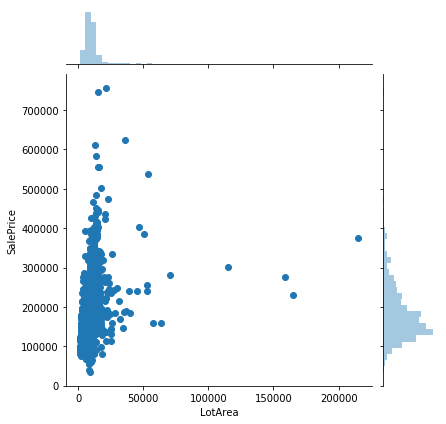

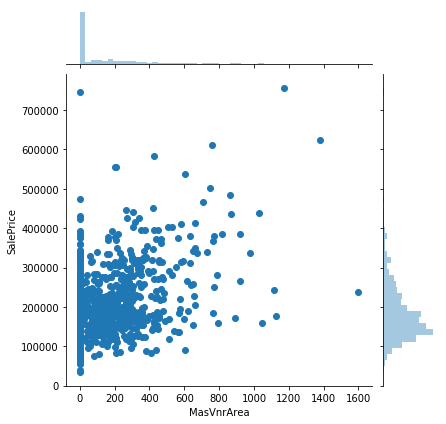

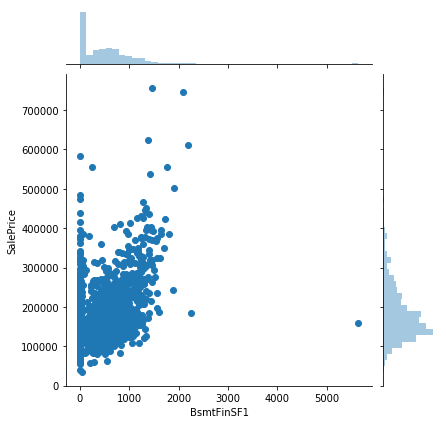

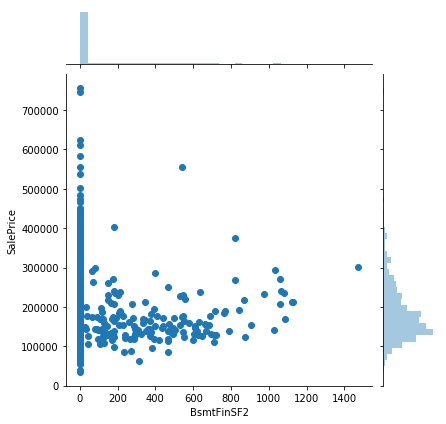

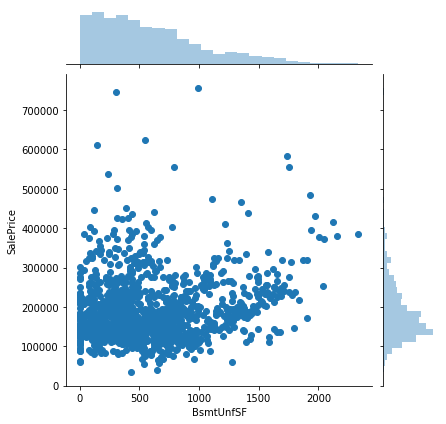

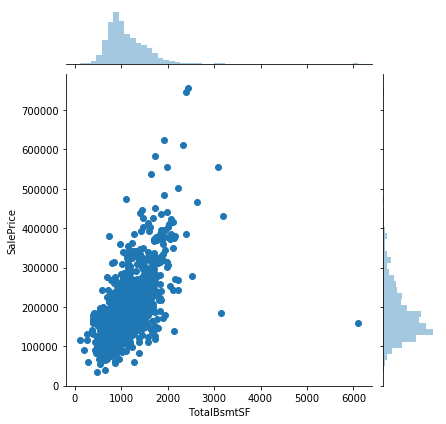

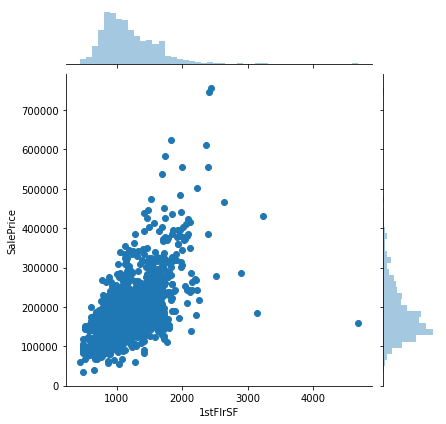

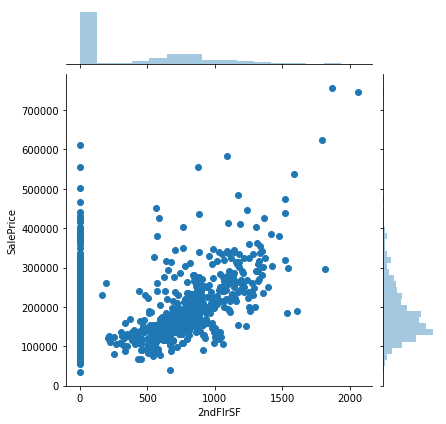

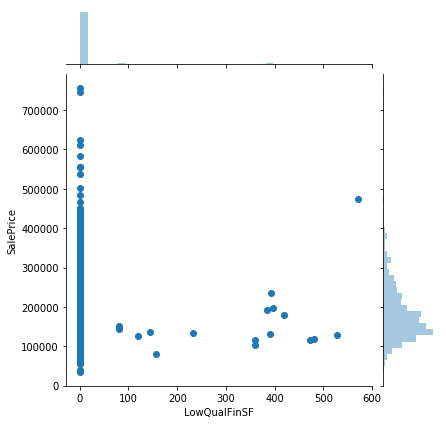

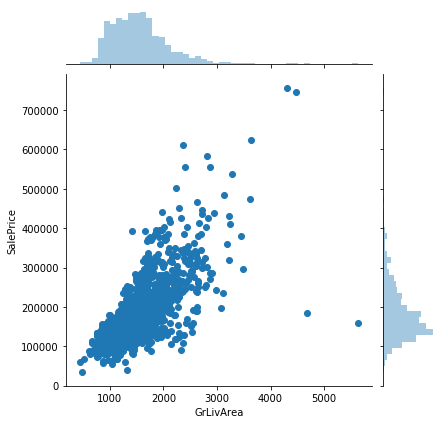

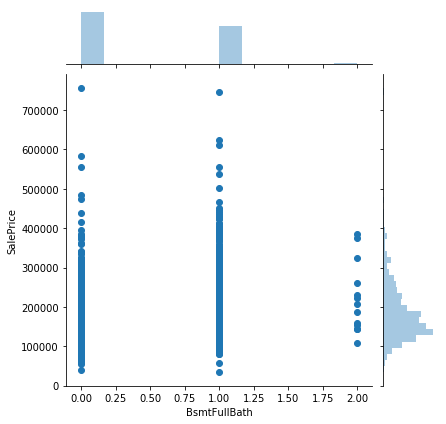

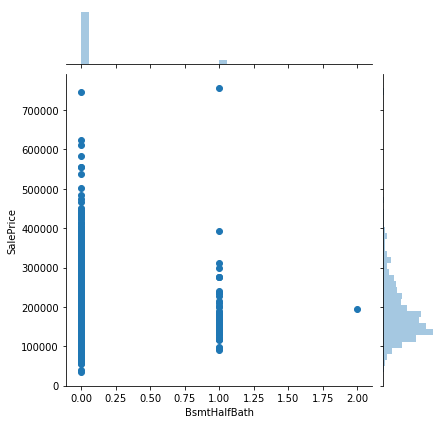

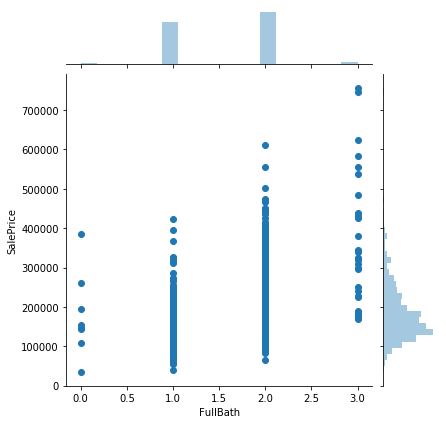

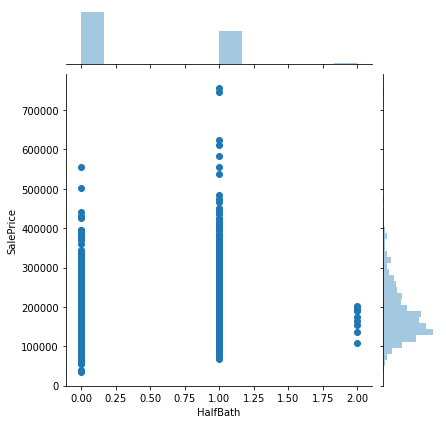

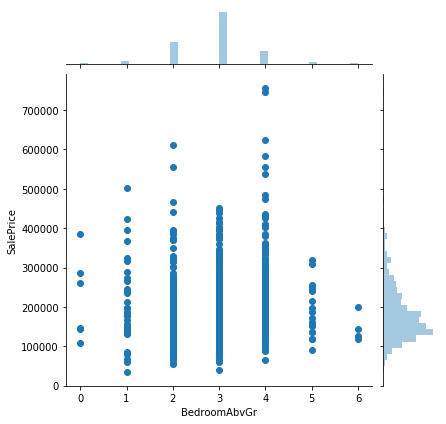

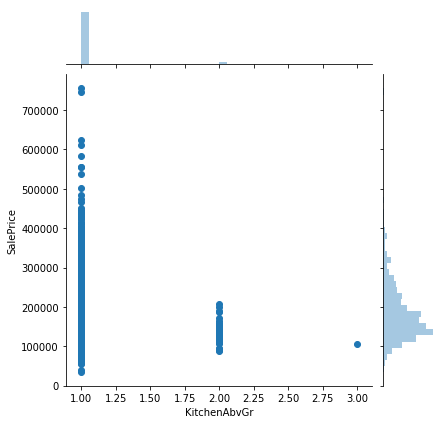

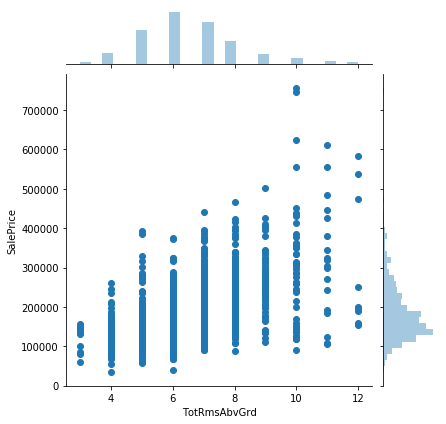

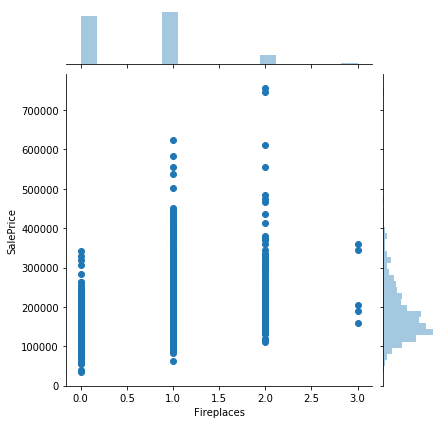

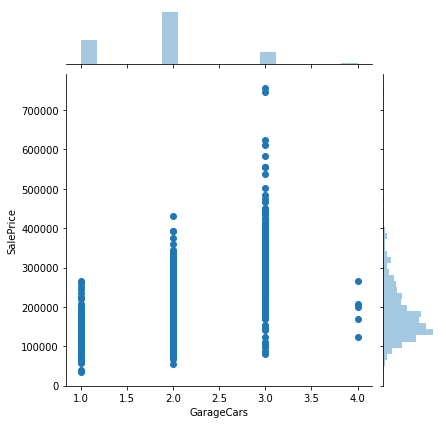

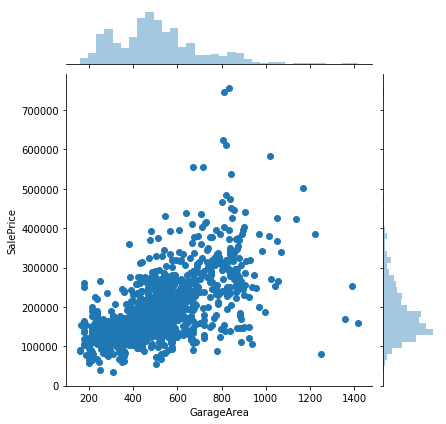

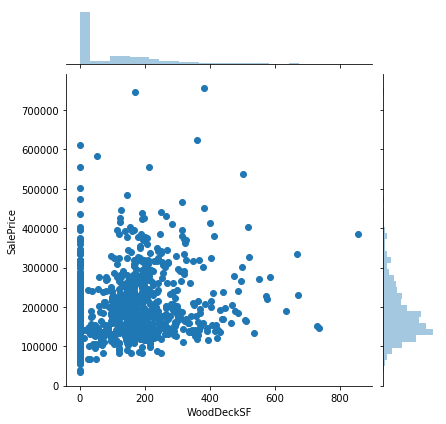

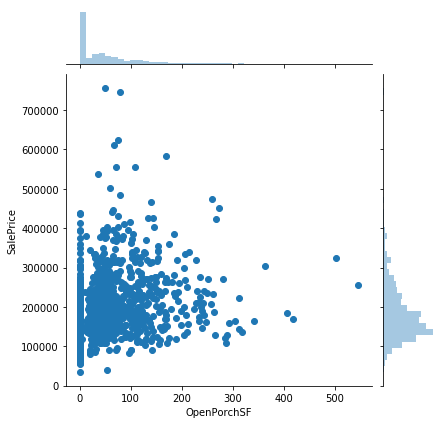

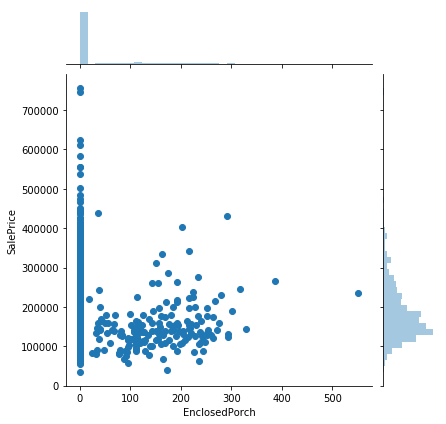

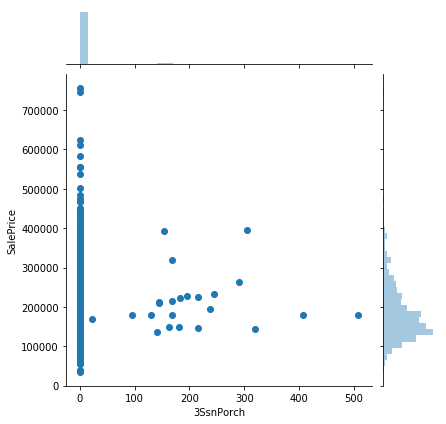

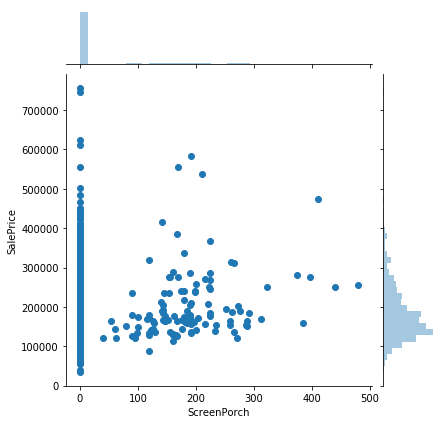

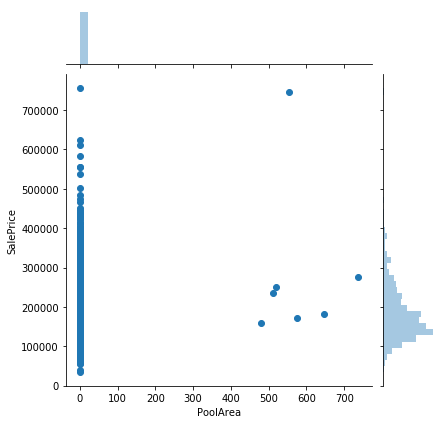

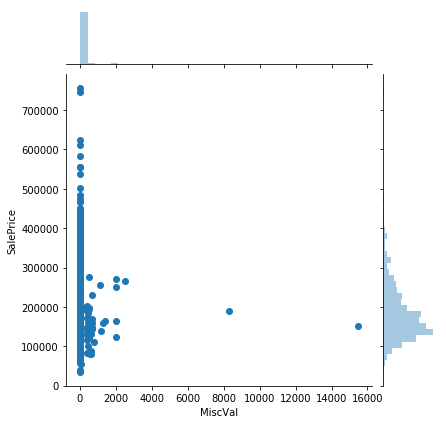

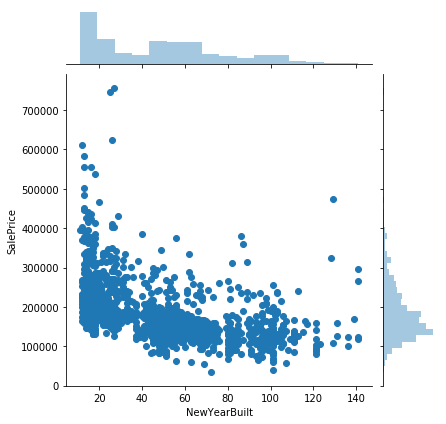

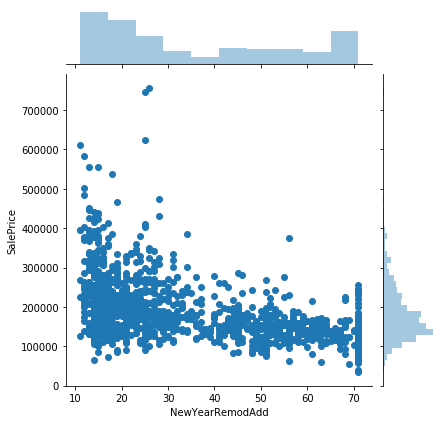

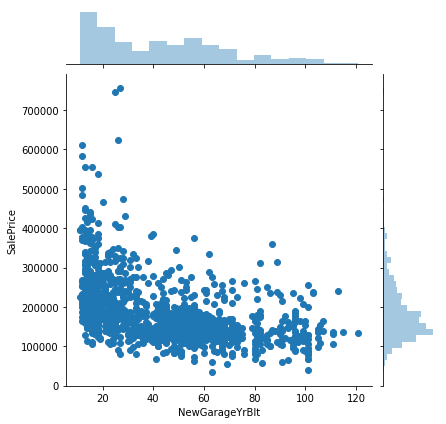

In [22]:
#numerical analysis
for i, col in enumerate(num_col):
    num_col_analysis(i, col, out_col)

<Figure size 432x288 with 0 Axes>

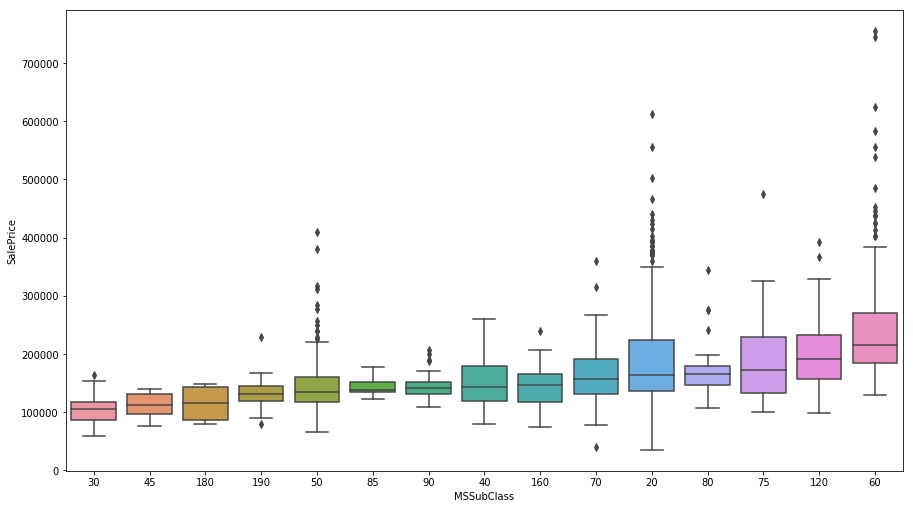

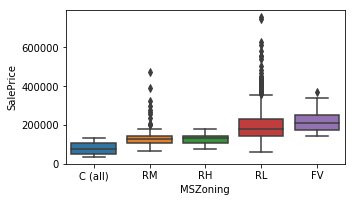

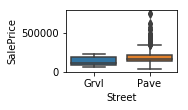

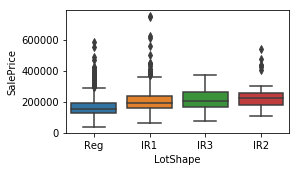

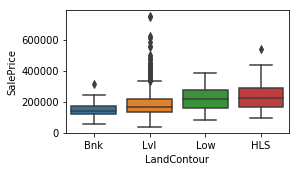

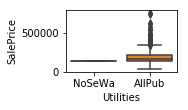

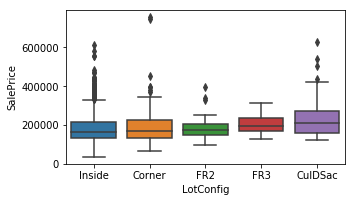

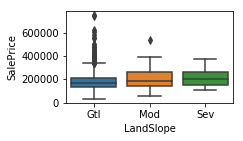

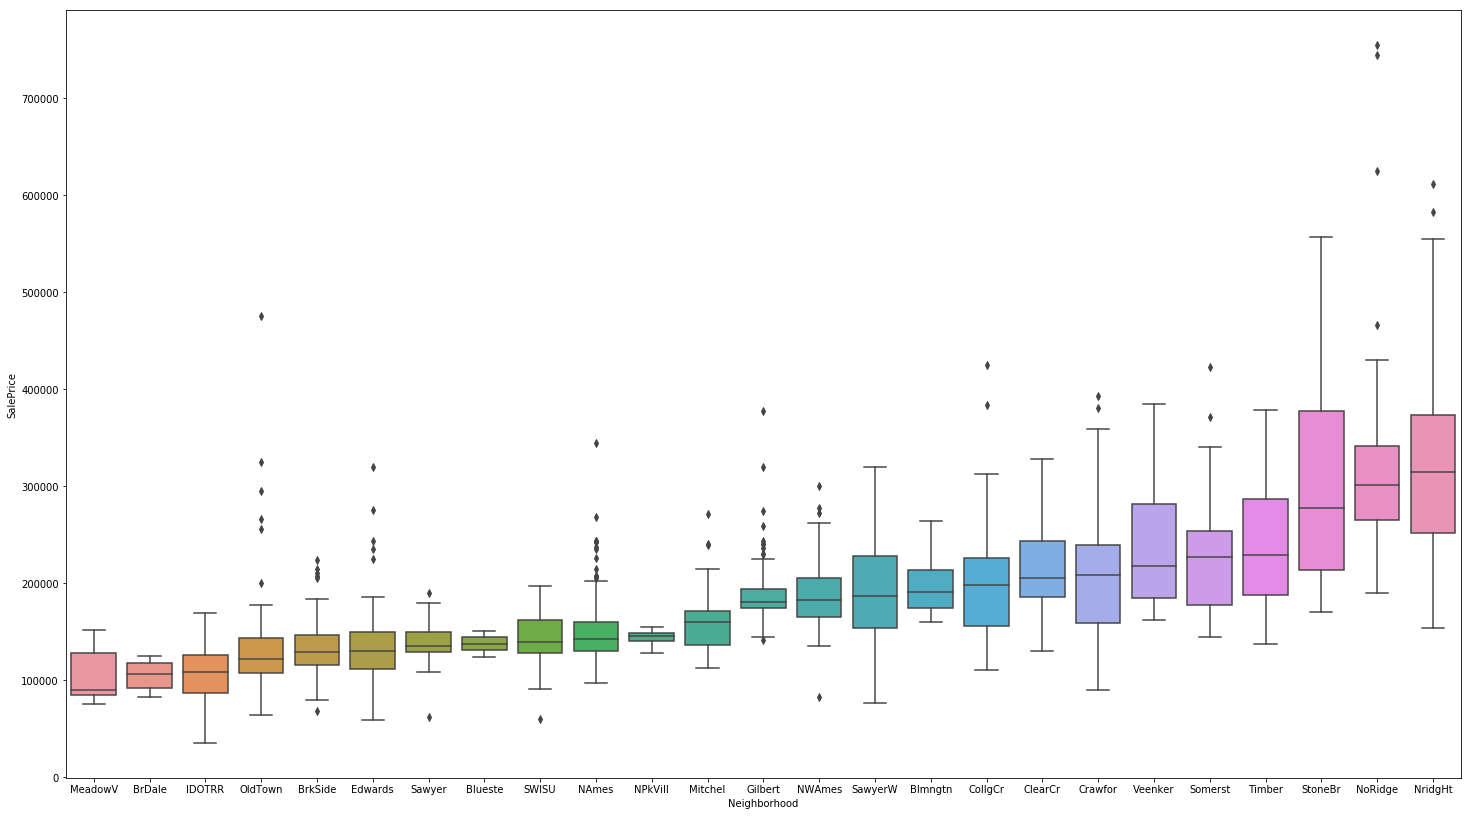

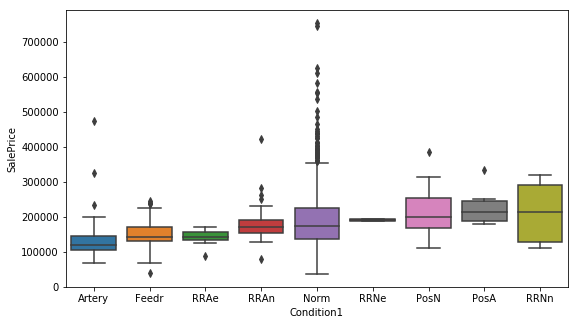

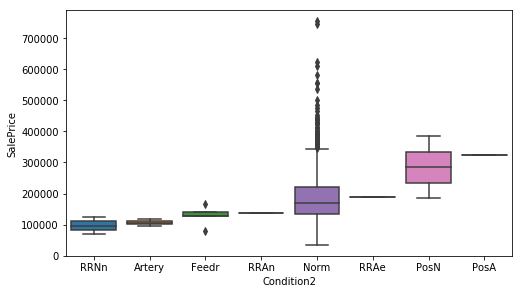

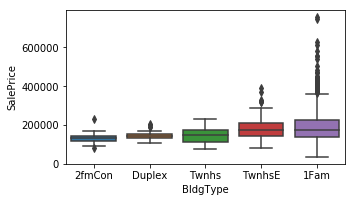

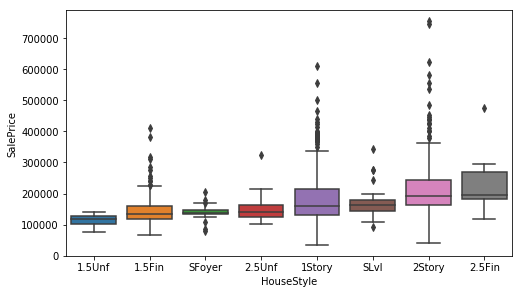

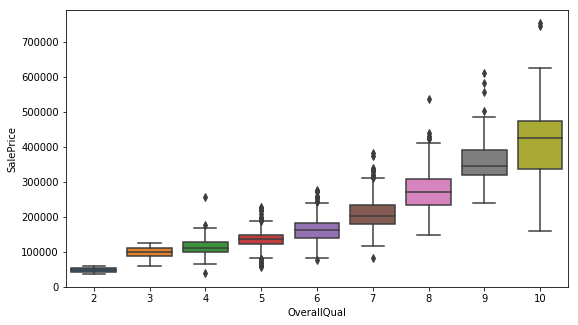

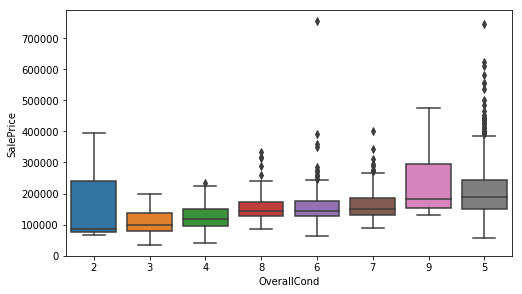

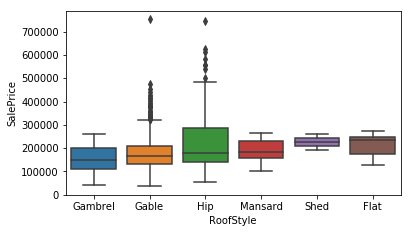

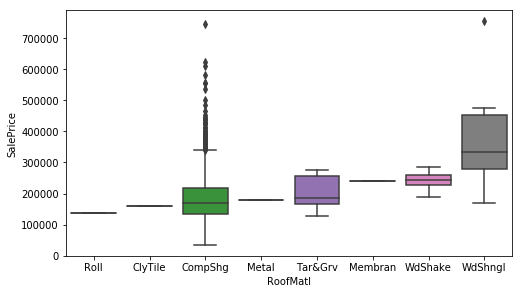

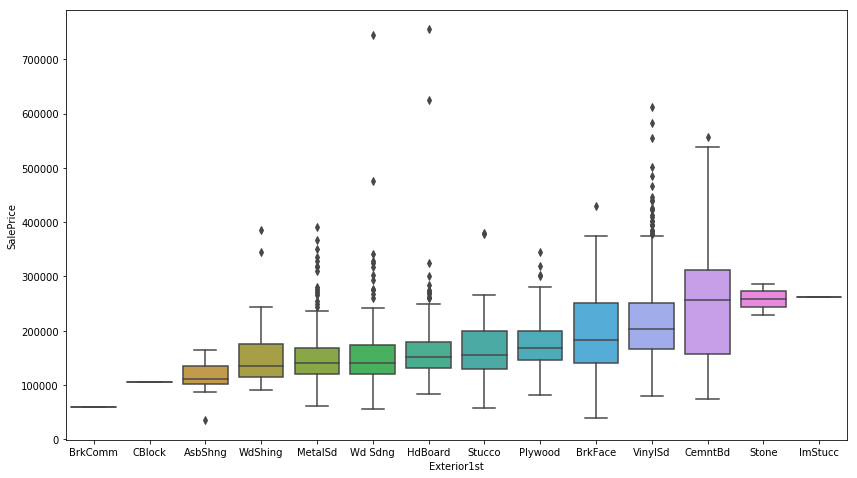

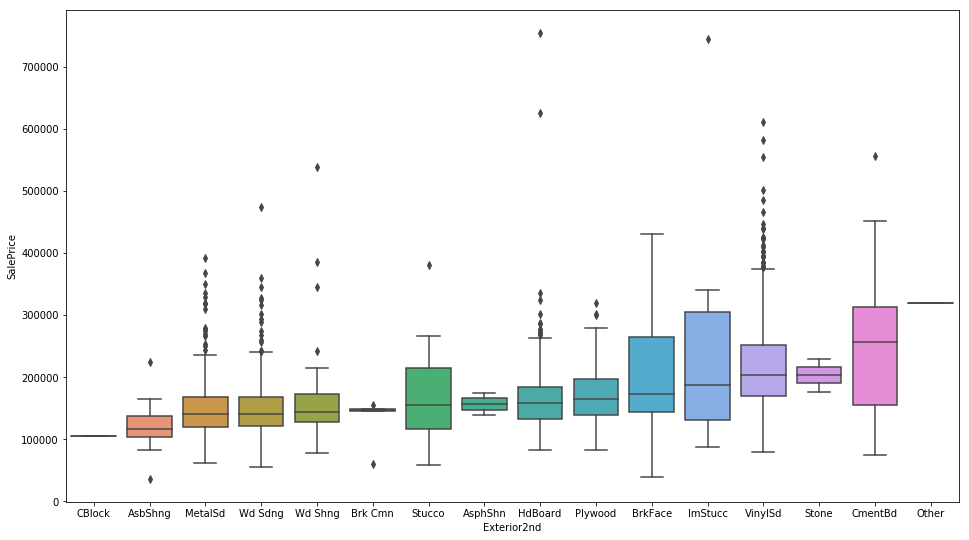

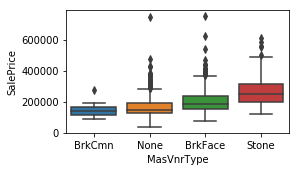

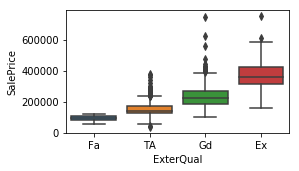

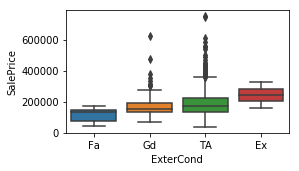

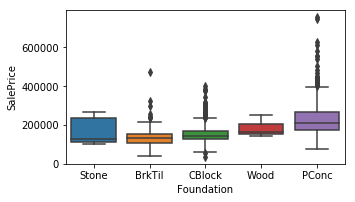

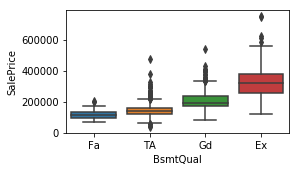

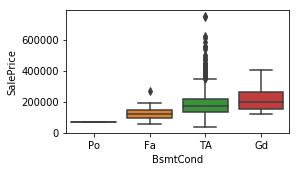

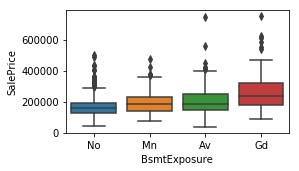

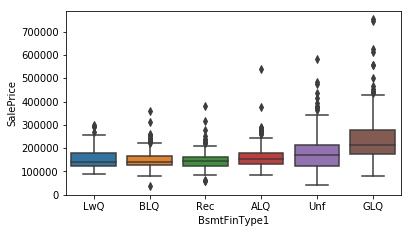

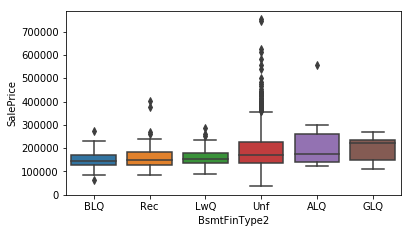

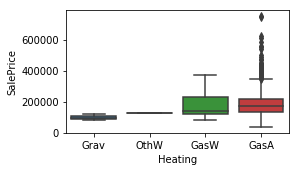

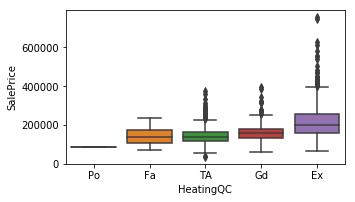

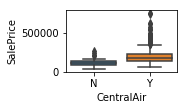

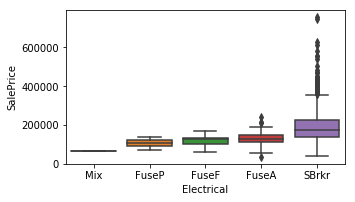

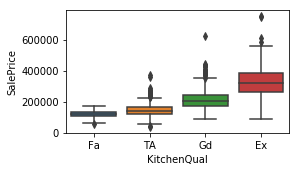

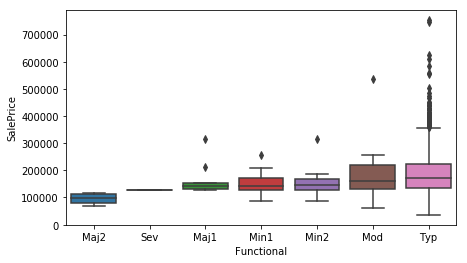

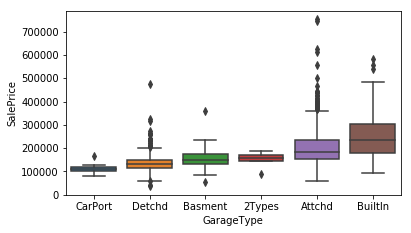

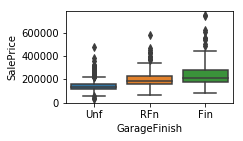

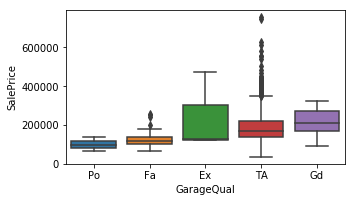

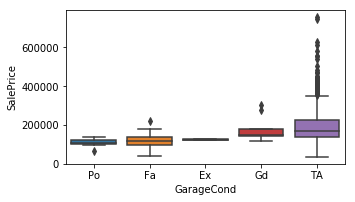

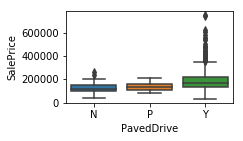

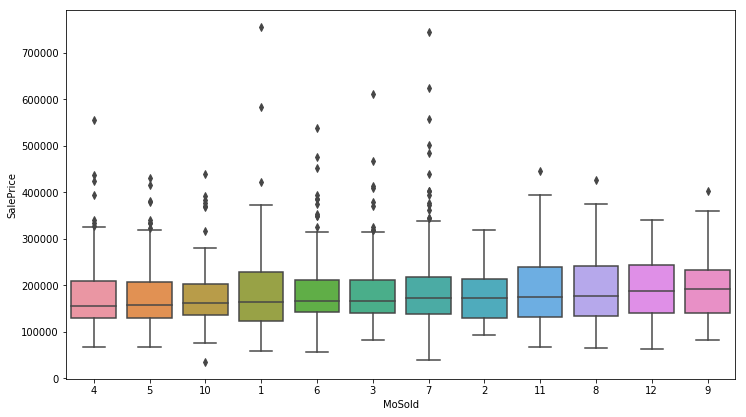

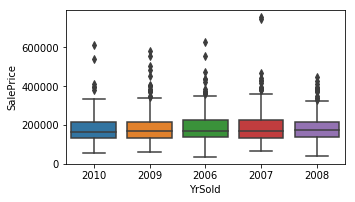

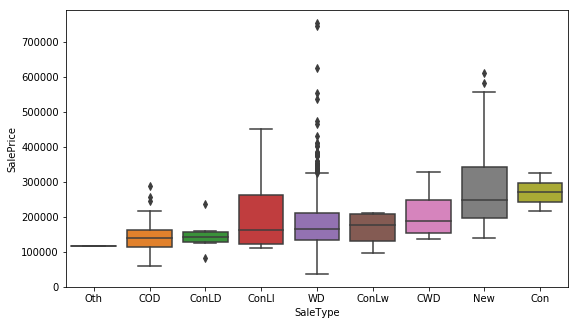

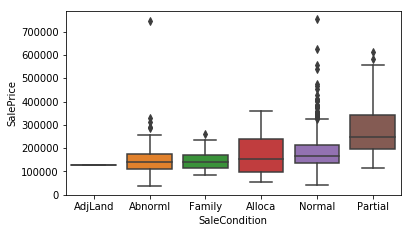

In [23]:
#categorical analysis
for i, col in enumerate(category_col):
    category_col_analysis(i, col, out_col)

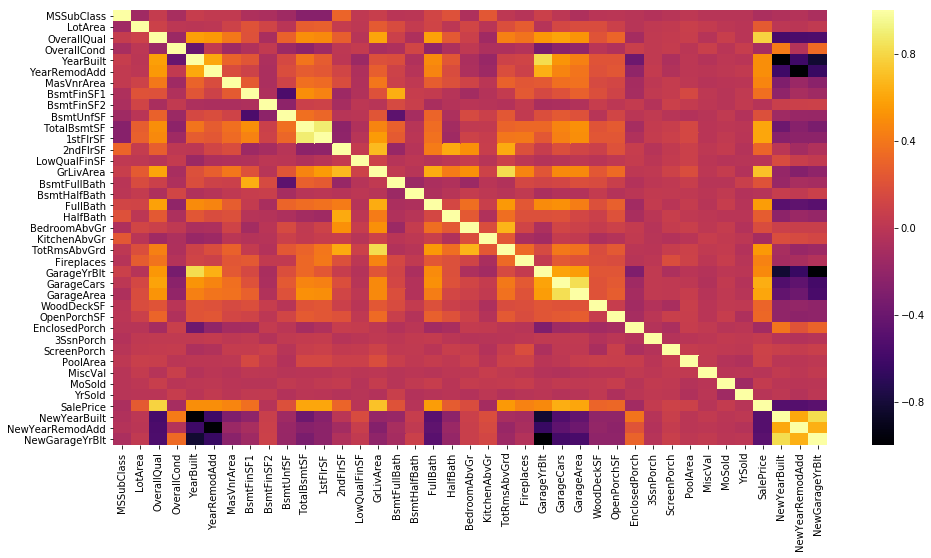

In [24]:
#plotting heatmap
plt.figure(figsize=(16,8))
sns.heatmap(df_data.corr(), cmap="inferno", annot=False)
plt.show()

__Note__ : There exists collinearity in the table.

In [25]:
#dumifying category columns
for col in category_col:
    dummies = pd.get_dummies(df_data[col], drop_first = True)
    dummies = dummies.add_prefix(f'{col}_')
    df_data = pd.concat([df_data, dummies], axis = 1)
    df_data.drop([col], axis = 1, inplace = True)

df_data.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,2003,2003,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
1,9600,1976,1976,0.0,978,0,284,1262,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,11250,2001,2002,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0
3,9550,1915,1970,0.0,216,0,540,756,961,756,...,0,0,0,0,1,0,0,0,0,0
4,14260,2000,2000,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0


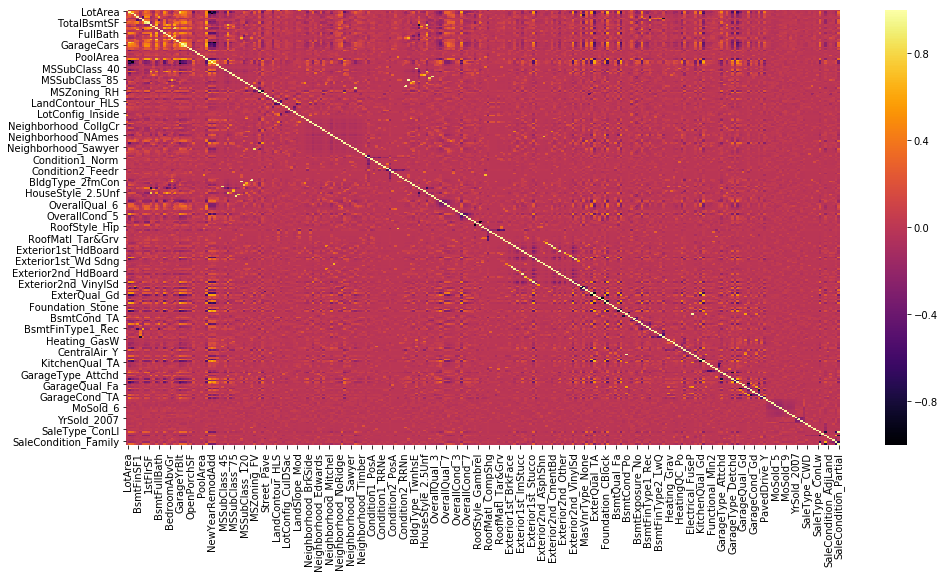

In [26]:
#plotting correlations on a heatmap

plt.figure(figsize=(16,8))
sns.heatmap(df_data.corr(), cmap="inferno", annot=False)
plt.show()

__Note__ : Feature selection is necessary due to collinearity

__Data Preparation__

In [27]:
# Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 
from scipy import stats
z = np.abs(stats.zscore(df_data[num_col]))
selected_data = df_data[num_col][(z < 3).all(axis=1)]
df_data = df_data.loc[selected_data.index]
df_data

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,2003,2003,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
2,11250,2001,2002,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0
4,14260,2000,2000,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0
6,10084,2004,2005,186.0,1369,0,317,1686,1694,0,...,0,0,0,0,1,0,0,0,1,0
10,11200,1965,1965,0.0,906,0,134,1040,1040,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,9262,2008,2009,194.0,0,0,1573,1573,1578,0,...,0,0,1,0,0,0,0,0,0,1
1452,3675,2005,2005,80.0,547,0,0,547,1072,0,...,0,0,0,0,1,0,0,0,1,0
1454,7500,2004,2005,0.0,410,0,811,1221,1221,0,...,0,0,0,0,1,0,0,0,1,0
1455,7917,1999,2000,0.0,0,0,953,953,953,694,...,0,0,0,0,1,0,0,0,1,0


In [28]:
#preparing Test and Train Set and splitting the train and test sets
y = df_data.loc[:, out_col]
X = df_data.loc[:, df_data.columns != out_col]

#scaling
scaler = StandardScaler()
scaler.fit(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 1)

__Linear Regression Model__

In [29]:
#linear regression with all predictors, fit the model and r2 scores
lm = LinearRegression()
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.952833351210155
0.8984820444406533


In [30]:
#checking mean squared error
mean_squared_error(y_test, y_test_pred)

435356062.4976199

In [31]:
#cofficient params for all the columns
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-526400.184, 'constant'),
 (-63863.821, 'MSSubClass_180'),
 (62640.815, 'SaleCondition_AdjLand'),
 (-53248.349, 'MSSubClass_85'),
 (47012.779, 'HouseStyle_SFoyer'),
 (44092.321, 'OverallQual_9'),
 (-42957.4, 'SaleCondition_Alloca'),
 (42036.962, 'MSZoning_FV'),
 (39549.886, 'HouseStyle_1.5Unf'),
 (39209.612, 'OverallQual_10'),
 (-37944.635, 'MSSubClass_80'),
 (36826.987, 'Exterior2nd_CmentBd'),
 (-36522.122, 'Neighborhood_MeadowV'),
 (-35873.347, 'MSSubClass_160'),
 (-33144.306, 'Functional_Mod'),
 (30698.139, 'SaleCondition_Partial'),
 (-30551.207, 'MSSubClass_90'),
 (-30551.207, 'BldgType_Duplex'),
 (30452.485, 'HouseStyle_SLvl'),
 (30308.413, 'OverallCond_9'),
 (-29947.172, 'MSSubClass_45'),
 (-29489.098, 'RoofMatl_WdShake'),
 (29459.633, 'MSZoning_RH'),
 (27882.273, 'OverallCond_8'),
 (26553.494, 'MSZoning_RL'),
 (-26510.601, 'SaleType_ConLI'),
 (26438.286, 'Foundation_Stone'),
 (26359.862, 'Condition1_RRNn'),
 (25205.134, 'Functional_Typ'),
 (23830.594, 'Neighborhood_StoneBr'),


__Note__:

    Simple Linear Regression gave us a complex model with most of the coefficients as non-zero values.
    It did not help in feature selection.

__Performing Ridge Regression__

In [32]:
#list of alphas to tune for Ridge Regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [33]:
#plotting model_cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.089055,1.601617e-01,0.003989,0.000892,0.0001,{'alpha': 0.0001},-20040.256818,-17967.075902,-15258.901538,-17502.421801,...,-17616.946451,1527.025762,26,-8737.003001,-8945.166118,-9844.210751,-9291.960715,-9425.734304,-9248.814978,385.178467
1,0.007780,1.322974e-03,0.003590,0.000798,0.001,{'alpha': 0.001},-20027.830659,-17759.392909,-15181.867438,-17467.724044,...,-17541.619134,1541.145329,25,-8739.359052,-8951.056300,-9847.929777,-9292.639738,-9427.303278,-9251.657629,384.936980
2,0.006981,3.015783e-07,0.003591,0.000798,0.01,{'alpha': 0.01},-19898.767497,-16814.836486,-14864.608162,-17201.725579,...,-17149.608530,1607.907570,24,-8758.827889,-8991.596631,-9875.386254,-9298.375155,-9438.644122,-9272.566010,383.278214
3,0.007380,4.892397e-04,0.003988,0.000631,0.05,{'alpha': 0.05},-19387.795251,-16084.056206,-14262.329824,-16586.477091,...,-16545.029498,1644.749270,23,-8817.485726,-9050.513803,-9951.254475,-9323.263753,-9467.278612,-9321.959274,386.084982
4,0.009177,9.779940e-04,0.003588,0.000488,0.1,{'alpha': 0.1},-18968.234339,-15768.549106,-13827.787686,-16208.502370,...,-16164.238942,1642.766428,21,-8871.944933,-9090.693200,-10013.223890,-9357.765057,-9492.690014,-9365.263419,388.561055


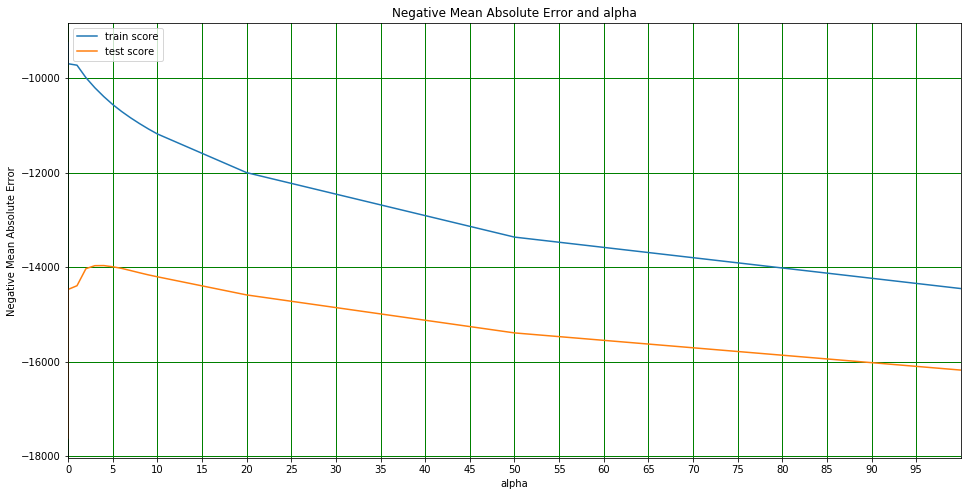

In [34]:
#plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='g', linestyle='-', linewidth=1)
plt.show()

In [35]:
#getting ridge model best lambda
model_cv.best_estimator_


Ridge(alpha=4.0)

In [36]:
#r2 score results
alpha = 4
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9460249894962849
0.9152898297301233


In [37]:
#checking mean squared error
mean_squared_error(y_test, y_test_pred_ridge)

363276486.2038341

In [38]:
#ridge model parameters with coefficients
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-484787.162, 'constant'),
 (26508.528, 'OverallQual_9'),
 (21072.822, 'Neighborhood_StoneBr'),
 (-17360.768, 'KitchenQual_Gd'),
 (17017.168, 'Functional_Typ'),
 (-16934.519, 'KitchenQual_TA'),
 (16306.799, 'Neighborhood_Crawfor'),
 (-15955.873, 'Functional_Mod'),
 (-15133.388, 'Neighborhood_MeadowV'),
 (-12748.031, 'SaleCondition_Alloca'),
 (12522.33, 'Exterior1st_BrkFace'),
 (11717.671, 'SaleCondition_Partial'),
 (-11558.389, 'OverallCond_3'),
 (-10949.877, 'Condition1_RRAe'),
 (-10826.345, 'MSSubClass_160'),
 (10825.35, 'BsmtExposure_Gd'),
 (-10550.902, 'Neighborhood_Edwards'),
 (-10502.732, 'KitchenQual_Fa'),
 (10327.416, 'MSZoning_FV'),
 (10207.03, 'OverallQual_10'),
 (-9935.215, 'OverallQual_4'),
 (9581.424, 'OverallCond_8'),
 (-9395.542, 'OverallQual_6'),
 (8705.198, 'BsmtFinType1_GLQ'),
 (8551.531, 'MasVnrType_Stone'),
 (-8479.422, 'BsmtQual_Gd'),
 (8322.03, 'Neighborhood_BrDale'),
 (8248.003, 'Condition1_Norm'),
 (-8213.917, 'BsmtQual_TA'),
 (-8094.663, 'Neighborhood_NWAmes')

__Note__ :
    
    Ridge regression gave us a complex model with most of the coefficients as non-zero values.
    It did not help in the feature selection.

__Performing Lasso Regression__

In [39]:
#lasso regression
lasso = Lasso()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [40]:
#model_cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.143312,0.082313,0.004787,0.001164,0.0001,{'alpha': 0.0001},-20354.989290,-17139.509653,-15146.586233,-17522.701449,...,-17488.137806,1665.476378,27,-8739.546114,-8997.068544,-9855.239799,-9294.859731,-9430.943130,-9263.531464,380.707240
1,0.094544,0.010003,0.004389,0.000489,0.001,{'alpha': 0.001},-20351.941084,-17131.209484,-15144.100412,-17519.524150,...,-17483.646574,1665.599763,26,-8739.570861,-8997.070072,-9855.245437,-9294.846648,-9430.947550,-9263.536114,380.702141
2,0.097140,0.008777,0.003790,0.000978,0.01,{'alpha': 0.01},-20322.990556,-17056.620745,-15118.840954,-17486.896703,...,-17440.481851,1667.230864,25,-8739.937154,-8997.225114,-9855.416348,-9294.854997,-9431.030123,-9263.692747,380.640152
3,0.097938,0.007064,0.004987,0.000891,0.05,{'alpha': 0.05},-20303.619698,-16981.060842,-15078.585628,-17415.147825,...,-17356.992132,1681.741279,24,-8741.822025,-8998.252448,-9857.015693,-9295.137387,-9431.705720,-9264.786655,380.539318
4,0.094148,0.008801,0.003589,0.000799,0.1,{'alpha': 0.1},-20264.859289,-16955.900975,-15028.055928,-17393.540778,...,-17310.196283,1687.123558,23,-8744.295160,-8999.585884,-9859.435085,-9295.617117,-9432.800541,-9266.346758,380.530318


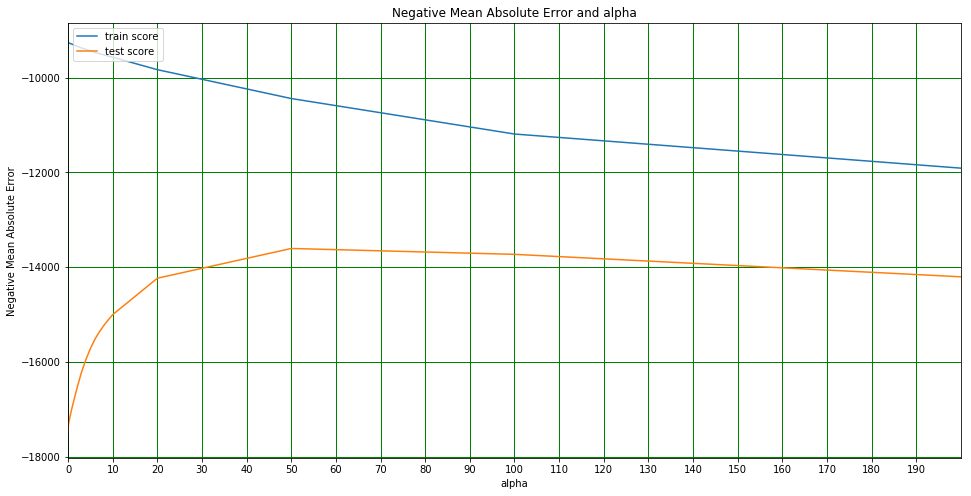

In [41]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='g', linestyle='-', linewidth=1)
plt.show()

In [42]:
#getting the best estimator for lambda
model_cv.best_estimator_

Lasso(alpha=50)

In [43]:
#r2 score results
alpha =50
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9451804944627855
0.9145348792017317


In [44]:
#checking mean squared error
mean_squared_error(y_test, y_test_pred_lasso)


366514064.10431623

In [45]:
#model params with lasso
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-1749883.891, 'constant'),
 (44090.81, 'OverallQual_9'),
 (28811.319, 'OverallQual_10'),
 (-28616.24, 'SaleCondition_Alloca'),
 (27458.272, 'Neighborhood_StoneBr'),
 (-27408.595, 'Functional_Mod'),
 (23028.136, 'Neighborhood_Crawfor'),
 (-22777.991, 'Neighborhood_MeadowV'),
 (-19807.934, 'KitchenQual_TA'),
 (-19293.312, 'KitchenQual_Gd'),
 (18086.014, 'SaleCondition_Partial'),
 (17443.443, 'Exterior1st_BrkFace'),
 (15927.706, 'Functional_Typ'),
 (15336.547, 'OverallQual_8'),
 (-14376.206, 'Condition1_RRAe'),
 (-13807.831, 'KitchenQual_Fa'),
 (-13204.071, 'MSSubClass_160'),
 (12439.447, 'BsmtExposure_Gd'),
 (10677.755, 'MSZoning_FV'),
 (10541.689, 'Neighborhood_NoRidge'),
 (10172.209, 'Neighborhood_BrkSide'),
 (9456.502, 'OverallCond_8'),
 (8633.016, 'MasVnrType_Stone'),
 (8270.356, 'Exterior1st_CemntBd'),
 (-8254.628, 'OverallCond_3'),
 (8002.555, 'BsmtFinType1_GLQ'),
 (-7815.645, 'Neighborhood_Edwards'),
 (-7740.807, 'OverallCond_5'),
 (6881.349, 'Condition1_Norm'),
 (-6532.466, 'Bs

__Note__:

    Lasso Regression gave us a simpler model with most of the coefficients as zero values.
    It has helped in the feature selection.

__Performing RFE__

In [46]:
#running RFE with the output number of the variable equal to 30
rfe = RFE(lm, 30)            
rfe = rfe.fit(X_train, y_train)

In [47]:
#listing out the top 30 columns that are selected in RFE
rfe_selected_predictors = X_train.columns[rfe.support_]
rfe_selected_predictors

Index(['YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt',
       'NewYearBuilt', 'NewYearRemodAdd', 'NewGarageYrBlt', 'MSSubClass_75',
       'MSSubClass_90', 'Condition2_Feedr', 'Condition2_Norm',
       'Condition2_RRNn', 'BldgType_Duplex', 'HouseStyle_2.5Unf',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofMatl_Tar&Grv', 'GarageType_Attchd',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageQual_Fa',
       'GarageQual_Gd', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_Po', 'GarageCond_TA'],
      dtype='object')

In [48]:
#defining function to take the column names as parameter and create a model along with displaying its statistics
def make_model_stats(cols):
    cols=list(cols)
    X_train_lm = sm.add_constant(X_train[cols])
    lr = sm.OLS(y_train, X_train_lm).fit()
    print('='*78)
    print(f'Parameters obtained for {cols}')
    print('='*78)
    print(lr.params)
    print('='*78,'\n')
    #printing the params
    print('='*78)
    print(lr.summary())
    print('='*78,'\n')
    #creating a dataframe that will contain the names of all the feature variables and their respective VIFs
    print('='*78)
    print(f'Computing VIF values to keep track of multicollinearity')
    print('='*78)
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    print('='*78)

In [49]:
#model 1
#considering all the columns selected by RFE for our first model
make_model_stats(list(df_data[rfe_selected_predictors]))

Parameters obtained for ['YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'NewYearBuilt', 'NewYearRemodAdd', 'NewGarageYrBlt', 'MSSubClass_75', 'MSSubClass_90', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_RRNn', 'BldgType_Duplex', 'HouseStyle_2.5Unf', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofMatl_Tar&Grv', 'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA']
const                    -0.168256
YearBuilt               112.334830
YearRemodAdd              0.280632
1stFlrSF                124.806998
2ndFlrSF                 81.627518
GarageYrBlt             -83.858422
NewYearBuilt           -452.379571
NewYearRemodAdd        -340.325372
NewGarageYrBlt         -256.186318
MSSubClass_75          7874.848618
MSSubClass_90         -4091.462699
Condition2_Feedr     -11850.173338
Condition2_Norm      

In [50]:
#model 2
#considering all the columns selected by Lasso for our second model
make_model_stats(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Functional_Mod', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'Functional_Typ', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'Neighborhood_BrkSide', 'OverallCond_8', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    211555.786196
OverallQual_9             91607.338623
OverallQual_10            72474.274804
SaleCondition_Alloca     -64806.887443
Neighborhood_StoneBr      32001.856483
Functional_Mod            -6000.629520
Neighborhood_Crawfor      40134.212919
Neighborhood_MeadowV     -76764.002034
KitchenQual_TA           -64442.203727
KitchenQual_Gd           -4029

In [51]:
#model 3
#getting better VIF values with the features selected by Lasso
lasso_selected_features.remove('Functional_Typ')
make_model_stats(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Functional_Mod', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'Neighborhood_BrkSide', 'OverallCond_8', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    211932.673435
OverallQual_9             91627.401478
OverallQual_10            72494.448562
SaleCondition_Alloca     -64793.601281
Neighborhood_StoneBr      31976.977889
Functional_Mod            -6356.819275
Neighborhood_Crawfor      40138.519223
Neighborhood_MeadowV     -76703.816419
KitchenQual_TA           -64446.979291
KitchenQual_Gd           -40287.996529
SaleCondi

In [52]:
#model 4
lasso_selected_features.remove('Functional_Mod')
make_model_stats(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'Neighborhood_BrkSide', 'OverallCond_8', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    211854.098572
OverallQual_9             91646.311525
OverallQual_10            72507.796095
SaleCondition_Alloca     -64714.770585
Neighborhood_StoneBr      31955.375853
Neighborhood_Crawfor      40179.705046
Neighborhood_MeadowV     -76466.582073
KitchenQual_TA           -64509.499322
KitchenQual_Gd           -40265.705617
SaleCondition_Partial     23492.508700
Exterior1st_BrkFace       3

In [53]:
#model 5
lasso_selected_features.remove('OverallCond_8')
make_model_stats(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'Neighborhood_BrkSide', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    212926.722456
OverallQual_9             91357.734121
OverallQual_10            72242.997361
SaleCondition_Alloca     -64645.189868
Neighborhood_StoneBr      31791.000668
Neighborhood_Crawfor      40575.190078
Neighborhood_MeadowV     -75862.432497
KitchenQual_TA           -65002.186502
KitchenQual_Gd           -40595.949699
SaleCondition_Partial     23433.923444
Exterior1st_BrkFace       33688.408672
Overa

In [54]:
#model 6
lasso_selected_features.remove('Neighborhood_BrkSide')
make_model_stats(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    212474.326162
OverallQual_9             91460.977335
OverallQual_10            72472.257771
SaleCondition_Alloca     -63815.691357
Neighborhood_StoneBr      31863.853414
Neighborhood_Crawfor      40948.066014
Neighborhood_MeadowV     -75456.612663
KitchenQual_TA           -65061.358070
KitchenQual_Gd           -40405.521254
SaleCondition_Partial     23446.854316
Exterior1st_BrkFace       34014.610266
OverallQual_8             399

In [55]:
#model 7
lasso_selected_features.remove('MSZoning_FV')
make_model_stats(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'Neighborhood_NoRidge', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    212090.098373
OverallQual_9             91693.159249
OverallQual_10            73443.100653
SaleCondition_Alloca     -63875.269308
Neighborhood_StoneBr      30357.730124
Neighborhood_Crawfor      40847.901932
Neighborhood_MeadowV     -77755.465273
KitchenQual_TA           -64873.284473
KitchenQual_Gd           -39842.292811
SaleCondition_Partial     24010.594905
Exterior1st_BrkFace       34120.910180
OverallQual_8             40185.141358
Condi

In [56]:
#model 8
lasso_selected_features.remove('Condition1_Norm')
make_model_stats(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'Neighborhood_NoRidge', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'BsmtQual_TA', 'GarageCond_Fa']
const                    216603.780767
OverallQual_9             91646.914523
OverallQual_10            73667.690253
SaleCondition_Alloca     -62617.702106
Neighborhood_StoneBr      30649.441876
Neighborhood_Crawfor      41139.872407
Neighborhood_MeadowV     -77277.730201
KitchenQual_TA           -65116.568862
KitchenQual_Gd           -39921.589684
SaleCondition_Partial     23921.682325
Exterior1st_BrkFace       33763.124187
OverallQual_8             40214.451337
Condition1_RRAe         

In [57]:
#model 9
lasso_selected_features.remove('OverallCond_5')
make_model_stats(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'Neighborhood_NoRidge', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'BsmtQual_TA', 'GarageCond_Fa']
const                    220273.194346
OverallQual_9             92312.525236
OverallQual_10            74317.288936
SaleCondition_Alloca     -62669.002130
Neighborhood_StoneBr      29610.248933
Neighborhood_Crawfor      39487.910338
Neighborhood_MeadowV     -78764.789055
KitchenQual_TA           -64974.260017
KitchenQual_Gd           -39760.651420
SaleCondition_Partial     24752.541616
Exterior1st_BrkFace       32933.835323
OverallQual_8             40985.372071
Condition1_RRAe          -24666.780718
Ki

In [58]:
#final model parameters
lasso_selected_features

['OverallQual_9',
 'OverallQual_10',
 'SaleCondition_Alloca',
 'Neighborhood_StoneBr',
 'Neighborhood_Crawfor',
 'Neighborhood_MeadowV',
 'KitchenQual_TA',
 'KitchenQual_Gd',
 'SaleCondition_Partial',
 'Exterior1st_BrkFace',
 'OverallQual_8',
 'Condition1_RRAe',
 'KitchenQual_Fa',
 'MSSubClass_160',
 'BsmtExposure_Gd',
 'Neighborhood_NoRidge',
 'MasVnrType_Stone',
 'Exterior1st_CemntBd',
 'OverallCond_3',
 'BsmtFinType1_GLQ',
 'Neighborhood_Edwards',
 'BsmtQual_TA',
 'GarageCond_Fa']

__Model Evaluation__

Text(0,0.5,'Sales Price')

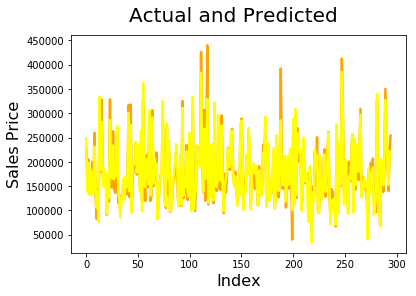

In [59]:
#simple Linear Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="orange", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred, color="yellow",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)             
plt.xlabel('Index', fontsize=16)                           
plt.ylabel('Sales Price', fontsize=16) 

Text(0,0.5,'Sales Price')

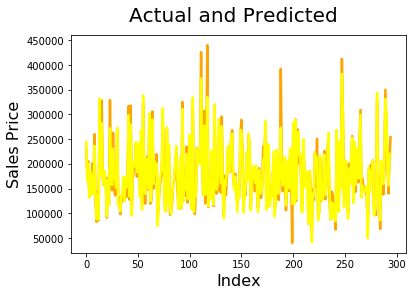

In [60]:
#ridge Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="orange", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_ridge, color="yellow",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)             
plt.xlabel('Index', fontsize=16)                              
plt.ylabel('Sales Price', fontsize=16)     

Text(0,0.5,'Sales Price')

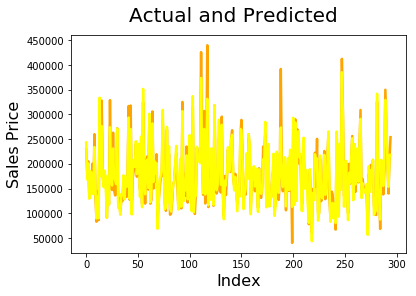

In [61]:
#lasso Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="orange", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_lasso, color="yellow",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=16)                              
plt.ylabel('Sales Price', fontsize=16)     

__Note__ :
   1. Model should be simpler as model accuracy same on all three models.
   2. Simple Linear Regression model and Ridge Regression model is fairly complex, hence we would not consider that.
   3. Optimum value of lambda for Ridge Regression is 4
   4. Lasso Regression model is simpler as most co-efficients are zero.
   5. Optimum value of lambda for Lasso Regression is 50

__Conclusion__

In [62]:
print("30 most important features that are affecting Sales pricing are:")
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    print(f'{v:40}Score: {k}')

30 most important features that are affecting Sales pricing are:
OverallQual_9                           Score: 44090.81
OverallQual_10                          Score: 28811.319
SaleCondition_Alloca                    Score: -28616.24
Neighborhood_StoneBr                    Score: 27458.272
Functional_Mod                          Score: -27408.595
Neighborhood_Crawfor                    Score: 23028.136
Neighborhood_MeadowV                    Score: -22777.991
KitchenQual_TA                          Score: -19807.934
KitchenQual_Gd                          Score: -19293.312
SaleCondition_Partial                   Score: 18086.014
Exterior1st_BrkFace                     Score: 17443.443
Functional_Typ                          Score: 15927.706
OverallQual_8                           Score: 15336.547
Condition1_RRAe                         Score: -14376.206
KitchenQual_Fa                          Score: -13807.831
MSSubClass_160                          Score: -13204.071
BsmtExposure_Gd  

__Note__ :
Major Features which influences sales pricing:
1. OverallCond
2. SaleCondition
3. Neighborhood
4. Functional
5. KitchenQual
6. Exterior1st
7. Condition1
8. MSSubClass
9. BsmtExposure
10. MSZoning